In [51]:
import numpy as np 
import pandas as pd 
import datetime
import os

from matplotlib import pyplot as plt

Load Covid 19 and SARS 2003 dataset

In [52]:
# load covid-19 data set
df_covid_19 = pd.read_csv("data/covid_19_data.csv") 
df_covid_19['Date'] = pd.to_datetime(df_covid_19['ObservationDate'])
df_covid_19['Outbreak'] = 'COVID_2019'
df_covid_19.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered', 'Date', 'Outbreak'],
      dtype='object')

In [53]:
df_covid_19.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date,Outbreak
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,2020-01-22,COVID_2019
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,2020-01-22,COVID_2019
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,2020-01-22,COVID_2019
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,2020-01-22,COVID_2019
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,2020-01-22,COVID_2019


In [54]:
# load SARS 2003 dataset
df_sars_03 = pd.read_csv("data/sars_2003_complete_dataset_clean.csv")
df_sars_03['Date'] = pd.to_datetime(df_sars_03['Date'])
df_sars_03['Province/State'] = None
df_sars_03['Outbreak'] = 'SARS_2003'
print(df_sars_03.columns)
df_sars_03.rename({'Cumulative number of case(s)':'Confirmed', 'Number of deaths':'Deaths', 'Number recovered':'Recovered', 'Country':'Country/Region'},axis=1,inplace=True)

Index(['Date', 'Country', 'Cumulative number of case(s)', 'Number of deaths',
       'Number recovered', 'Province/State', 'Outbreak'],
      dtype='object')


In [55]:
df_sars_03.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Province/State,Outbreak
0,2003-03-17,Germany,1,0,0,None,SARS_2003
1,2003-03-17,Canada,8,2,0,None,SARS_2003
2,2003-03-17,Singapore,20,0,0,None,SARS_2003
3,2003-03-17,"Hong Kong SAR, China",95,1,0,None,SARS_2003
4,2003-03-17,Switzerland,2,0,0,None,SARS_2003


In [56]:
df = df_covid_19
df = df.reset_index(drop=True)
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date,Outbreak
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,2020-01-22,COVID_2019
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,2020-01-22,COVID_2019
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,2020-01-22,COVID_2019
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,2020-01-22,COVID_2019
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,2020-01-22,COVID_2019


In [57]:
df['Confirmed'] = df['Confirmed'].fillna(0)
df['Province/State'] = df['Province/State'].fillna('Others')
df = df.sort_values(['Country/Region','Province/State','Date'])
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date,Outbreak
2663,2664,02/28/2020,Others,Azerbaijan,2020-02-28T15:03:26,1.0,0.0,0.0,2020-02-28,COVID_2019
4674,4675,03/10/2020,Others,"('St. Martin',)",2020-03-10T05:33:02,2.0,0.0,0.0,2020-03-10,COVID_2019
2258,2259,02/24/2020,Others,Afghanistan,2020-02-24T23:33:02,1.0,0.0,0.0,2020-02-24,COVID_2019
2351,2352,02/25/2020,Others,Afghanistan,2020-02-24T23:33:02,1.0,0.0,0.0,2020-02-25,COVID_2019
2452,2453,02/26/2020,Others,Afghanistan,2020-02-24T23:33:02,1.0,0.0,0.0,2020-02-26,COVID_2019


In [58]:
# group by country
df = df.groupby(['Outbreak','Country/Region','Province/State','Date']).agg({'Confirmed':'sum'}).reset_index()
df['Province/State'] = 'all'
df.head()

,Outbreak,Country/Region,Province/State,Date,Confirmed
0,COVID_2019,Azerbaijan,all,2020-02-28,1.0
1,COVID_2019,"('St. Martin',)",all,2020-03-10,2.0
2,COVID_2019,Afghanistan,all,2020-02-24,1.0
3,COVID_2019,Afghanistan,all,2020-02-25,1.0
4,COVID_2019,Afghanistan,all,2020-02-26,1.0


Remove countries with minor confirmation numbers

In [59]:
df_without_countries_minor_confirmation_number = df.groupby(['Outbreak','Country/Region','Province/State']).agg({'Confirmed':'max'})
df_without_countries_minor_confirmation_number = df_without_countries_minor_confirmation_number.loc[df_without_countries_minor_confirmation_number['Confirmed'] > 50]
df = pd.merge(df,t[[]],left_on=['Outbreak','Country/Region','Province/State'], right_index=True)

In [60]:
df['Country/Region'].value_counts()

US                15430
Russia            14066
Mainland China     9263
Japan              8504
India              5967
                  ...  
Tajikistan          200
Comoros             200
Lesotho             187
Others               46
Guadeloupe            9
Name: Country/Region, Length: 183, dtype: int64

In [61]:
country_data = pd.read_csv("data/countries of the world.csv")
country_data['Country'] = country_data['Country'].str.strip()
country_data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [62]:
df.loc[df['Country/Region']=='US','Country/Region'] = 'United States'
df.loc[df['Country/Region']=='Mainland China','Country/Region'] = 'China'
df.loc[df['Country/Region']=='Viet Nam','Country/Region'] = 'Vietnam'
df.loc[df['Country/Region']=='UK','Country/Region'] = 'United Kingdom'
df.loc[df['Country/Region']=='South Korea','Country/Region'] = 'Korea, South'
df.loc[df['Country/Region']=='Taiwan, China','Country/Region'] = 'Taiwan'
df.loc[df['Country/Region']=='Hong Kong SAR, China','Country/Region'] = 'Hong Kong'

df = pd.merge(df, country_data, how='left', left_on=['Country/Region'], right_on=['Country'])
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Outbreak,Country/Region,Province/State,Date,Confirmed,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,COVID_2019,Afghanistan,all,2020-02-24,1.0,Afghanistan,ASIA (EX. NEAR EAST),31056997.0,647500.0,"48,0",...,"3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,COVID_2019,Afghanistan,all,2020-02-25,1.0,Afghanistan,ASIA (EX. NEAR EAST),31056997.0,647500.0,"48,0",...,"3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
2,COVID_2019,Afghanistan,all,2020-02-26,1.0,Afghanistan,ASIA (EX. NEAR EAST),31056997.0,647500.0,"48,0",...,"3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
3,COVID_2019,Afghanistan,all,2020-02-27,1.0,Afghanistan,ASIA (EX. NEAR EAST),31056997.0,647500.0,"48,0",...,"3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
4,COVID_2019,Afghanistan,all,2020-02-28,1.0,Afghanistan,ASIA (EX. NEAR EAST),31056997.0,647500.0,"48,0",...,"3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"


In [67]:
df.loc[df['Country'].isnull()]['Country/Region'].value_counts()

North Macedonia             264
Bosnia and Herzegovina      256
Ivory Coast                 251
Congo (Kinshasa)            250
Antigua and Barbuda         248
Eswatini                    247
Trinidad and Tobago         247
Central African Republic    246
Congo (Brazzaville)         246
Montenegro                  244
Kosovo                      242
Cabo Verde                  241
Bahamas                     239
Gambia                      239
Diamond Princess            236
West Bank and Gaza          235
South Sudan                 225
Sao Tome and Principe       224
Others                       46
Name: Country/Region, dtype: int64

In [68]:
df.loc[df['Region'].isnull(), 'Region'] = 'Others'
df.loc[df['Country'].isnull(), 'Country'] = 'Undefined'

In [69]:
df['Country'].value_counts()

United States    15430
Russia           14066
China             9263
Japan             8504
India             5967
                 ...  
Yemen              220
Tajikistan         200
Comoros            200
Lesotho            187
Guadeloupe           9
Name: Country, Length: 165, dtype: int64

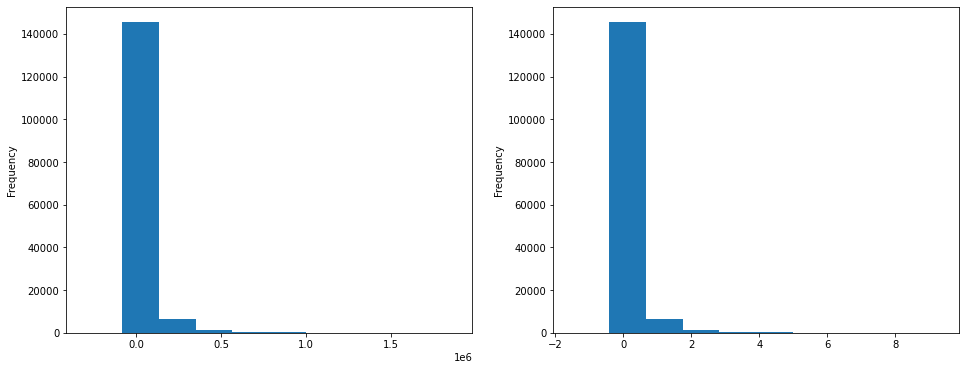

In [70]:
# Check for a proper normalization in case of an LSTM model
fix, ax = plt.subplots(figsize=(16,6), ncols=2)
s0 = df['Confirmed']
s0.plot.hist(ax=ax[0])

from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler(feature_range=(0,1)).fit(np.asarray([0, 2E5]).reshape(-1,1)) 
s1 = pd.Series(transformer.transform(s0.values.reshape(-1,1)).reshape(-1))
s1.plot.hist(ax=ax[1])
df['Confirmed_transformed'] = s1 

Feature engineering

In [71]:
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.week

Lags

In [72]:
# Let's use a 5-day-lag window to estimate the future development
n_lags = 5
for k,v in df.groupby(['Outbreak','Country/Region','Province/State']):    
    for d in range(n_lags,0,-1):                
        df.loc[v.index, f'Confirmed_Lag_{d}'] = v['Confirmed'].shift(d)
        df.loc[v.index, f'Confirmed_Transformed_Lag_{d}'] = v['Confirmed_transformed'].shift(d)

X_mask_lags = [c for c in df.columns if 'Confirmed_Lag_' in c]
X_mask_lags_transformed = [c for c in df.columns if 'Confirmed_Transformed_Lag_' in c]

df[X_mask_lags] = df[X_mask_lags].fillna(0)
df[X_mask_lags_transformed] = df[X_mask_lags_transformed].fillna(0)

print(f'Dataframe shape {df.shape}')
df.head()

Dataframe shape (153866, 38)


,Outbreak,Country/Region,Province/State,Date,Confirmed,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),...,Confirmed_Lag_5,Confirmed_Transformed_Lag_5,Confirmed_Lag_4,Confirmed_Transformed_Lag_4,Confirmed_Lag_3,Confirmed_Transformed_Lag_3,Confirmed_Lag_2,Confirmed_Transformed_Lag_2,Confirmed_Lag_1,Confirmed_Transformed_Lag_1
0,COVID_2019,Afghanistan,all,2020-02-24,1.0,Afghanistan,ASIA (EX. NEAR EAST),31056997.0,647500.0,"48,0",...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
1,COVID_2019,Afghanistan,all,2020-02-25,1.0,Afghanistan,ASIA (EX. NEAR EAST),31056997.0,647500.0,"48,0",...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,1.0,0.000005
2,COVID_2019,Afghanistan,all,2020-02-26,1.0,Afghanistan,ASIA (EX. NEAR EAST),31056997.0,647500.0,"48,0",...,0.0,0.0,0.0,0.000000,0.0,0.000000,1.0,0.000005,1.0,0.000005
3,COVID_2019,Afghanistan,all,2020-02-27,1.0,Afghanistan,ASIA (EX. NEAR EAST),31056997.0,647500.0,"48,0",...,0.0,0.0,0.0,0.000000,1.0,0.000005,1.0,0.000005,1.0,0.000005
4,COVID_2019,Afghanistan,all,2020-02-28,1.0,Afghanistan,ASIA (EX. NEAR EAST),31056997.0,647500.0,"48,0",...,0.0,0.0,1.0,0.000005,1.0,0.000005,1.0,0.000005,1.0,0.000005


Encoding

In [73]:
from sklearn.preprocessing import LabelEncoder
encoding_outbreak = LabelEncoder().fit(df['Outbreak'])
df['Outbreak_enc'] = encoding_outbreak.transform(df['Outbreak'])

encoding_country = LabelEncoder().fit(df['Country/Region'])
df['Country_enc'] = encoding_country.transform(df['Country/Region'])

enc_region = LabelEncoder().fit(df['Region'])
df['Region_enc'] = enc_region.transform(df['Region'])

df.head()

,Outbreak,Country/Region,Province/State,Date,Confirmed,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),...,Confirmed_Transformed_Lag_4,Confirmed_Lag_3,Confirmed_Transformed_Lag_3,Confirmed_Lag_2,Confirmed_Transformed_Lag_2,Confirmed_Lag_1,Confirmed_Transformed_Lag_1,Outbreak_enc,Country_enc,Region_enc
0,COVID_2019,Afghanistan,all,2020-02-24,1.0,Afghanistan,ASIA (EX. NEAR EAST),31056997.0,647500.0,"48,0",...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0,0,0
1,COVID_2019,Afghanistan,all,2020-02-25,1.0,Afghanistan,ASIA (EX. NEAR EAST),31056997.0,647500.0,"48,0",...,0.000000,0.0,0.000000,0.0,0.000000,1.0,0.000005,0,0,0
2,COVID_2019,Afghanistan,all,2020-02-26,1.0,Afghanistan,ASIA (EX. NEAR EAST),31056997.0,647500.0,"48,0",...,0.000000,0.0,0.000000,1.0,0.000005,1.0,0.000005,0,0,0
3,COVID_2019,Afghanistan,all,2020-02-27,1.0,Afghanistan,ASIA (EX. NEAR EAST),31056997.0,647500.0,"48,0",...,0.000000,1.0,0.000005,1.0,0.000005,1.0,0.000005,0,0,0
4,COVID_2019,Afghanistan,all,2020-02-28,1.0,Afghanistan,ASIA (EX. NEAR EAST),31056997.0,647500.0,"48,0",...,0.000005,1.0,0.000005,1.0,0.000005,1.0,0.000005,0,0,0


LGBM

In [74]:
from sklearn.model_selection import train_test_split

X_mask_cat = ['Outbreak_enc','Region_enc', 'Month','Week']
train_test = df.loc[df['Confirmed'] > 50].copy()
s_unique_values = train_test[X_mask_lags].apply(lambda r: len(np.unique(r.values)), axis=1)
train_test = train_test.loc[s_unique_values > 1].copy()
print(f'Train/Test shape {train_test.shape}')

train, valid = train_test_split(train_test, test_size=0.2, shuffle=True, random_state=231451)

Train/Test shape (127361, 41)


In [75]:
from lightgbm import LGBMRegressor     
model_lgbm = LGBMRegressor(n_estimators=200, metric='mae', random_state=1234, min_child_samples=5, min_child_weight=0.000001)

print(f'Fitting on data with shape {train[X_mask_cat+X_mask_lags].shape} with validation of shape {valid[X_mask_cat+X_mask_lags].shape}')

model_lgbm.fit(X=train[X_mask_cat+X_mask_lags], y=train['Confirmed'], 
               eval_set=(valid[X_mask_cat+X_mask_lags], valid['Confirmed']),
               early_stopping_rounds=50, verbose=10)

Fitting on data with shape (101888, 9) with validation of shape (25473, 9)
Training until validation scores don't improve for 50 rounds
[10]	valid_0's l1: 15808.5
[20]	valid_0's l1: 5912.94
[30]	valid_0's l1: 2678
[40]	valid_0's l1: 1761.71
[50]	valid_0's l1: 1515.72
[60]	valid_0's l1: 1440.87
[70]	valid_0's l1: 1410.57
[80]	valid_0's l1: 1386.6
[90]	valid_0's l1: 1373.7
[100]	valid_0's l1: 1360.48
[110]	valid_0's l1: 1350.95
[120]	valid_0's l1: 1342.48
[130]	valid_0's l1: 1335.79
[140]	valid_0's l1: 1331.57
[150]	valid_0's l1: 1324.47
[160]	valid_0's l1: 1320.64
[170]	valid_0's l1: 1318.69
[180]	valid_0's l1: 1316.49
[190]	valid_0's l1: 1314.22
[200]	valid_0's l1: 1311.68
Did not meet early stopping. Best iteration is:
[200]	valid_0's l1: 1311.68


LGBMRegressor(metric='mae', min_child_samples=5, min_child_weight=1e-06,
              n_estimators=200, random_state=1234)

In [76]:
# Out-of-sample prediction with 28 steps (days)
from datetime import timedelta
pred_steps = 28

history = df.loc[(df['Outbreak']=='COVID_2019') & (df['Confirmed'] > 0)]
history0 = history.iloc[-1]

dt_rng = pd.date_range(start=history0['Date']+timedelta(days=1), 
                       end=history0['Date']+timedelta(days=pred_steps),freq='D').values
dt_rng = pd.to_datetime(dt_rng)

pred_months = pd.Series(dt_rng).apply(lambda dt: dt.month)
pred_weeks = pd.Series(dt_rng).apply(lambda dt: dt.week)

pred_cat = history0[X_mask_cat].values
pred_lags = history0[X_mask_lags].values
y = history0['Confirmed']

print('History 0: ', pred_lags)
pred_lags[:n_lags] = np.roll(pred_lags[:n_lags], -1)
pred_lags[n_lags-1] = y  # Lag

print('Pred 0: ', pred_lags)

pred = np.zeros(pred_steps)
for d in range(pred_steps):     
    pred_cat[1] = pred_months[d]
    pred_cat[2] = pred_weeks[d]    
    
    y = model_lgbm.predict(np.hstack([pred_cat, pred_lags]).reshape(1,-1))[0]
    
    print(f'Step {d}, predicted for {dt_rng[d].strftime("%Y-%m-%d")} is: {y}')
    
    pred_lags[:n_lags] = np.roll(pred_lags[:n_lags], -1)
    pred_lags[n_lags-1] = y  # Lag    
 
    pred[d] = y
    
preds = pd.Series(data=pred, index=dt_rng, name='LGBM predicted')
preds

History 0:  [8610.0 8667.0 8696.0 8765.0 8786.0]
Pred 0:  [8667.0 8696.0 8765.0 8786.0 8829.0]
Step 0, predicted for 2020-11-16 is: 9153.64813387031
Step 1, predicted for 2020-11-17 is: 9255.491907937147
Step 2, predicted for 2020-11-18 is: 9255.491907937147
Step 3, predicted for 2020-11-19 is: 9255.491907937147
Step 4, predicted for 2020-11-20 is: 9255.491907937147
Step 5, predicted for 2020-11-21 is: 9255.491907937147
Step 6, predicted for 2020-11-22 is: 9255.491907937147
Step 7, predicted for 2020-11-23 is: 9255.491907937147
Step 8, predicted for 2020-11-24 is: 9255.491907937147
Step 9, predicted for 2020-11-25 is: 9255.491907937147
Step 10, predicted for 2020-11-26 is: 9255.491907937147
Step 11, predicted for 2020-11-27 is: 9255.491907937147
Step 12, predicted for 2020-11-28 is: 9255.491907937147
Step 13, predicted for 2020-11-29 is: 9255.491907937147
Step 14, predicted for 2020-11-30 is: 9255.491907937147
Step 15, predicted for 2020-12-01 is: 9255.491907937147
Step 16, predicted f

2020-11-16    9153.648134
2020-11-17    9255.491908
2020-11-18    9255.491908
2020-11-19    9255.491908
2020-11-20    9255.491908
2020-11-21    9255.491908
2020-11-22    9255.491908
2020-11-23    9255.491908
2020-11-24    9255.491908
2020-11-25    9255.491908
2020-11-26    9255.491908
2020-11-27    9255.491908
2020-11-28    9255.491908
2020-11-29    9255.491908
2020-11-30    9255.491908
2020-12-01    9255.491908
2020-12-02    9255.491908
2020-12-03    9255.491908
2020-12-04    9255.491908
2020-12-05    9255.491908
2020-12-06    9255.491908
2020-12-07    9255.491908
2020-12-08    9255.491908
2020-12-09    9255.491908
2020-12-10    9255.491908
2020-12-11    9255.491908
2020-12-12    9255.491908
2020-12-13    9255.491908
Name: LGBM predicted, dtype: float64